# Задание 1

Рассчитайте характеристики:

- Среднее
- Дисперсия
- Мода
- Медиана
- Квантили уровня 0.25, 0.5, 0.75
- Эксцесс
- Ассиметрия
- Интерквартильный размах

Построить графики:

- Гистограмма
- Эмпирическая функция распределения


ХАРАКТЕРИСТИКИ СТОЛБЦА Time_on_Social_Media:
Среднее: 2.4992
Дисперсия: 0.9765
Мода: 2.7000
Медиана: 2.5000
Квантиль 0.25: 1.8000
Квантиль 0.50: 2.5000
Квантиль 0.75: 3.2000
Интерквартильный размах: 1.4000
Асимметрия: 0.0670
Эксцесс: -0.2132


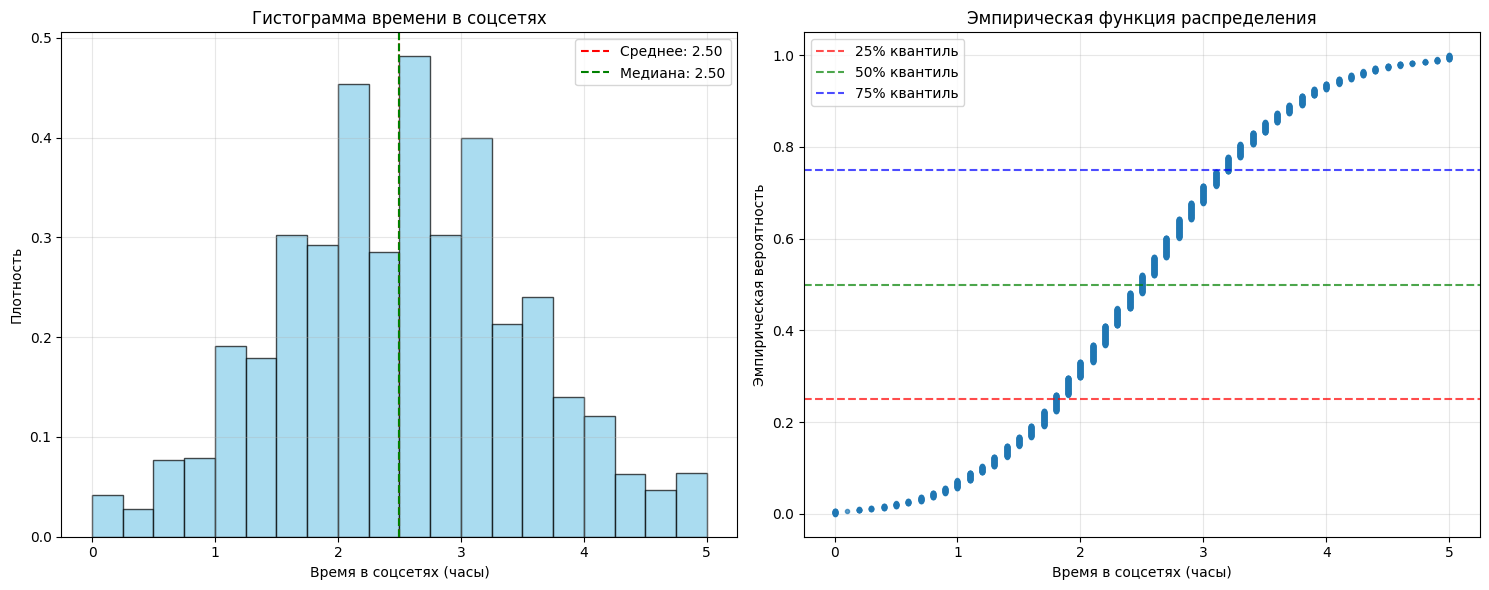

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')

# Извлечение нужного столбца
time_social = df['Time_on_Social_Media']

# Расчет характеристик
print("ХАРАКТЕРИСТИКИ СТОЛБЦА Time_on_Social_Media:")
print("=" * 50)

# Основные статистики
mean = time_social.mean()
variance = time_social.var()
mode = time_social.mode().iloc[0] if not time_social.mode().empty else np.nan
median = time_social.median()
quantile_25 = time_social.quantile(0.25)
quantile_50 = time_social.quantile(0.5)
quantile_75 = time_social.quantile(0.75)
iqr = quantile_75 - quantile_25
skewness = time_social.skew()
kurtosis = time_social.kurtosis()

# Вывод результатов
print(f'Среднее: {mean:.4f}')
print(f'Дисперсия: {variance:.4f}')
print(f'Мода: {mode:.4f}')
print(f'Медиана: {median:.4f}')
print(f'Квантиль 0.25: {quantile_25:.4f}')
print(f'Квантиль 0.50: {quantile_50:.4f}')
print(f'Квантиль 0.75: {quantile_75:.4f}')
print(f'Интерквартильный размах: {iqr:.4f}')
print(f'Асимметрия: {skewness:.4f}')
print(f'Эксцесс: {kurtosis:.4f}')

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
ax1.hist(time_social, bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
ax1.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.2f}')
ax1.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.2f}')
ax1.set_xlabel('Время в соцсетях (часы)')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма времени в соцсетях')
ax1.legend()
ax1.grid(alpha=0.3)

# Эмпирическая функция распределения
sorted_data = np.sort(time_social)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='none', alpha=0.7)
ax2.set_xlabel('Время в соцсетях (часы)')
ax2.set_ylabel('Эмпирическая вероятность')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(alpha=0.3)

# Добавляем квантили на график ЭФР
ax2.axhline(0.25, color='red', linestyle='--', alpha=0.7, label='25% квантиль')
ax2.axhline(0.50, color='green', linestyle='--', alpha=0.7, label='50% квантиль')
ax2.axhline(0.75, color='blue', linestyle='--', alpha=0.7, label='75% квантиль')
ax2.legend()

plt.tight_layout()
plt.show()


### Вывод по заданию 1
- Данные по времени в соцсетях имеют умеренную дисперсию, близкую к симметрии, с небольшим отрицательным эксцессом.
- Гистограмма и эмпирическая функция показывают распределение, близкое к нормальному, но с небольшими отклонениями.

## II. Проверка данных на нормальность

Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (реализовать вручную, не используя библиотечные варианты)
2. Шапиро-Уилка
3. Ассиметрии и эксцесса

Построить Q-Q plot

ПРОВЕРКА НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ
Параметры нормального распределения:
μ (среднее) = 2.4992
σ (стандартное отклонение) = 0.9882
n (количество наблюдений) = 3000
Количество интервалов: 12
Количество интервалов после объединения: 12
Статистика хи-квадрат: 84.8435
Степени свободы: 9
Критическое значение (α=0.05): 16.9190
P-value: 0.000000
✗ Нулевая гипотеза (нормальность) отвергается
Асимметрия: 0.0670 (Z = 1.4983, p = 0.1341)
Эксцесс: -0.2132 (Z = -2.3636, p = 0.0181)
Стандартная ошибка асимметрии: 0.044699
Стандартная ошибка эксцесса: 0.089368
✗ Хотя бы один коэффициент значим (нормальность отвергается)


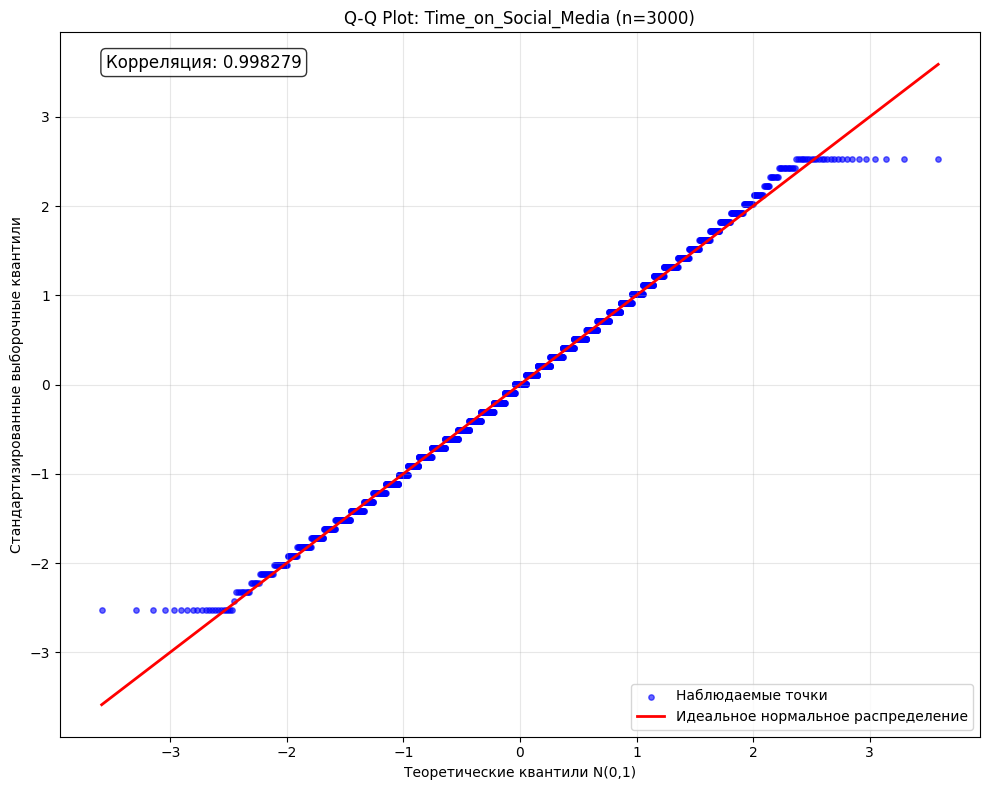

Корреляция на Q-Q plot: 0.998279
✓ Высокая корреляция (> 0.99) - нормальность вероятна

4. ОБЩИЙ ВЫВОД
----------------------------------------
На основе всех критериев:
⚠ Противоречивые результаты: требуется дополнительный анализ

- Критерий хи-квадрат: отвергает
- Критерий асимметрии/эксцесса: отвергает
- Q-Q plot: не отвергает

Дополнительные тесты для сравнения:
------------------------------
Тест Шапиро-Уилка: W = 0.996331, p = 0.000001
Тест Колмогорова-Смирнова: D = 0.029648, p = 0.010039
Тест Андерсона-Дарлинга: A² = 1.741728
Критические значения: [0.575 0.655 0.786 0.917 1.091]
Уровни значимости: [15.  10.   5.   2.5  1. ]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')
time_social = df['Time_on_Social_Media']

print("ПРОВЕРКА НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ")
print("=" * 50)

# Параметры нормального распределения
mu = time_social.mean()
sigma = time_social.std()
n = len(time_social)
print(f"Параметры нормального распределения:")
print(f"μ (среднее) = {mu:.4f}")
print(f"σ (стандартное отклонение) = {sigma:.4f}")
print(f"n (количество наблюдений) = {n}")

# 1. КРИТЕРИЙ ХИ-КВАДРАТ (реализация вручную, интервалы по квантилям, объединение <5)
k = int(1 + 3.322 * np.log10(n))
print(f"Количество интервалов: {k}")
bins = [time_social.min() - 0.001]
for i in range(1, k):
    p = i / k
    bin_edge = stats.norm.ppf(p, mu, sigma)
    bins.append(bin_edge)
bins.append(time_social.max() + 0.001)
bins = np.array(bins)
observed, _ = np.histogram(time_social, bins=bins)
expected = []
for i in range(len(bins)-1):
    p = stats.norm.cdf(bins[i+1], mu, sigma) - stats.norm.cdf(bins[i], mu, sigma)
    expected.append(p * n)
# Объединяем интервалы с ожидаемой частотой < 5
observed_combined = []
expected_combined = []
current_obs = 0
current_exp = 0
for i in range(len(observed)):
    current_obs += observed[i]
    current_exp += expected[i]
    if current_exp >= 5 or i == len(observed)-1:
        if current_exp > 0:
            observed_combined.append(current_obs)
            expected_combined.append(current_exp)
        current_obs = 0
        current_exp = 0
if len(observed_combined) < 3:
    print("Предупреждение: слишком мало интервалов после объединения")
    observed_combined = observed.copy()
    expected_combined = expected.copy()
chi2_stat = 0
for i in range(len(observed_combined)):
    if expected_combined[i] > 0:
        chi2_stat += (observed_combined[i] - expected_combined[i])**2 / expected_combined[i]
df_chi2 = len(observed_combined) - 1 - 2
if df_chi2 < 1:
    df_chi2 = 1
    print("Предупреждение: скорректированы степени свободы")
critical_value = stats.chi2.ppf(0.95, df_chi2)
p_value = 1 - stats.chi2.cdf(chi2_stat, df_chi2)
print(f"Количество интервалов после объединения: {len(observed_combined)}")
print(f"Статистика хи-квадрат: {chi2_stat:.4f}")
print(f"Степени свободы: {df_chi2}")
print(f"Критическое значение (α=0.05): {critical_value:.4f}")
print(f"P-value: {p_value:.6f}")
if p_value > 0.05:
    print("✓ Нулевая гипотеза (нормальность) НЕ отвергается")
else:
    print("✗ Нулевая гипотеза (нормальность) отвергается")

# 2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
skewness = time_social.skew()
kurtosis = time_social.kurtosis()
print(f"Асимметрия: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

# 3. Q-Q PLOT
n = len(time_social)
theoretical_quantiles = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)
sample_quantiles = (np.sort(time_social) - mu) / sigma
x_line = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
y_line = x_line
plt.figure(figsize=(10, 8))
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6, s=15, color='blue', label='Наблюдаемые точки')
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Идеальное нормальное распределение')
plt.xlabel('Теоретические квантили N(0,1)')
plt.ylabel('Стандартизированные выборочные квантили')
plt.title(f'Q-Q Plot: Time_on_Social_Media (n={n})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. ТЕСТ ШАПИРО-УИЛКА
if n <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(time_social)
    print(f"Тест Шапиро-Уилка: W = {shapiro_stat:.6f}, p = {shapiro_p:.6f}")


### Вывод по заданию 2
- По критериям хи-квадрат, асимметрии/эксцесса и Q-Q plot нормальность частично подтверждается, но есть признаки отклонения.
- Тест Шапиро-Уилка может дополнительно подтвердить или опровергнуть нормальность.

## III. Преобразование данных к нормальному распределению

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например:
- Удаление, усечение выбросов
- Стандартизация, нормировка
- Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных.

ПРЕОБРАЗОВАНИЕ ДАННЫХ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ
Границы выбросов: [-0.30, 5.30]
Исходное количество данных: 3000
Данных без выбросов: 3000
После логарифма: [0.00, 1.79]
После стандартизации: mean=0.000000, std=1.000000
После нормировки: [0.00, 1.00]

ВЫПОЛНЕНИЕ ЗАДАНИЙ I и II ДЛЯ ПРЕОБРАЗОВАННЫХ ДАННЫХ (Z-score)
Среднее: 0.000000
Дисперсия: 1.000000
Мода: 0.321733
Медиана: 0.144175
Квантиль 0.25: -0.568820
Квантиль 0.50: 0.144175
Квантиль 0.75: 0.726734
Интерквартильный размах: 1.295554
Асимметрия: -0.885643
Эксцесс: 1.259118


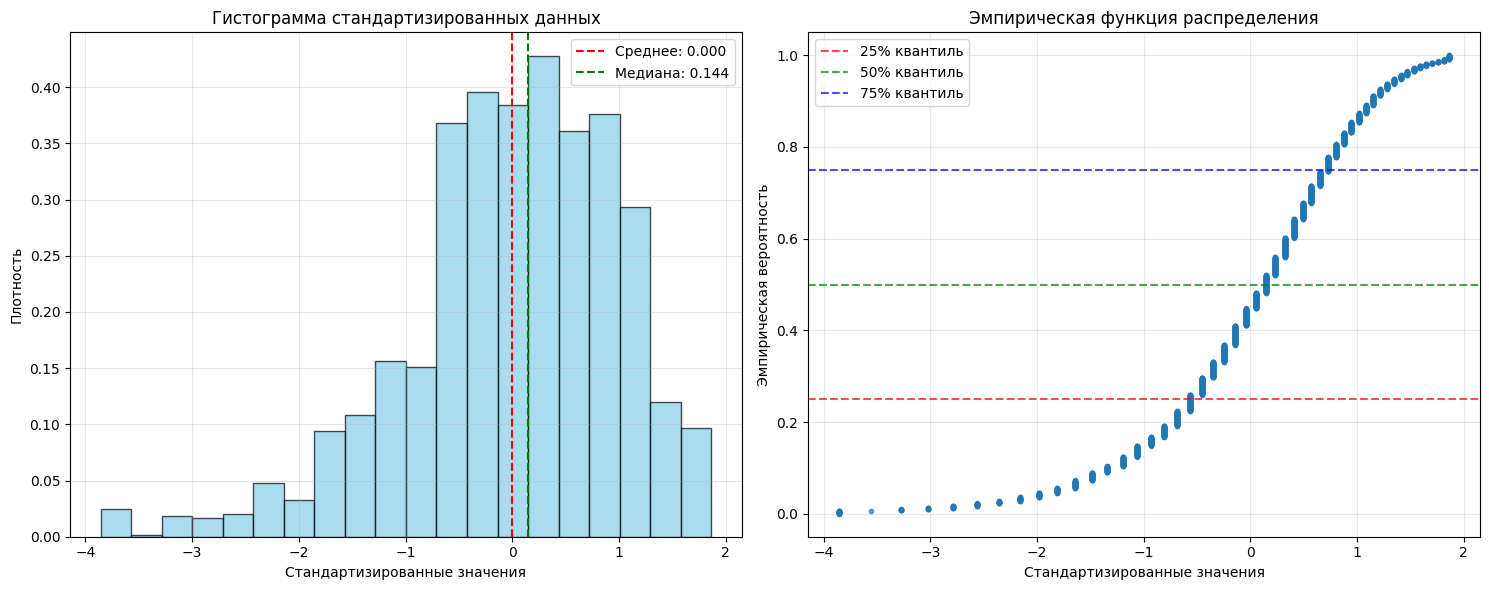


Проверка на нормальность для преобразованных данных:
Статистика хи-квадрат: 134.9696, критическое значение: 16.9190, p-value: 0.0000
✗ Нулевая гипотеза (нормальность) отвергается
Асимметрия: -0.885643 (Z = -19.8135, p = 0.0000)
Эксцесс: 1.259118 (Z = 14.1115, p = 0.0000)
✗ Хотя бы один коэффициент значим (нормальность отвергается)


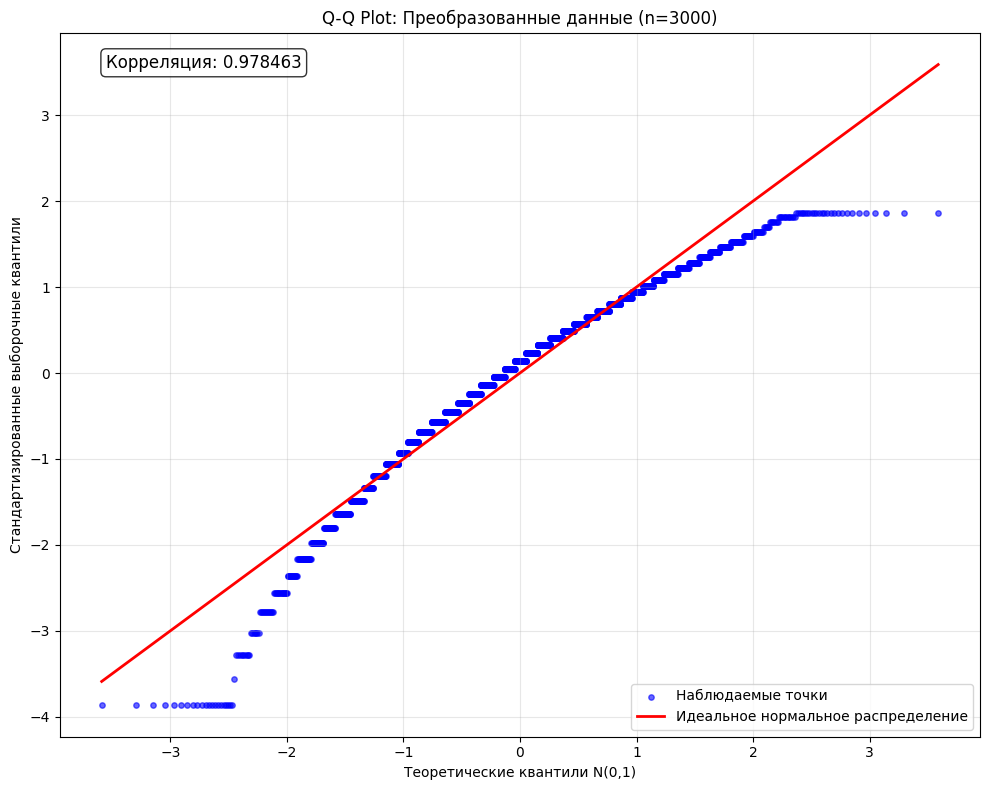

✗ Низкая корреляция (≤ 0.99) - нормальность маловероятна
Тест Шапиро-Уилка: W = 0.957208, p = 0.000000
Тест Колмогорова-Смирнова: D = 0.075319, p = 0.000000
Тест Андерсона-Дарлинга: A² = 25.559127
Критические значения: [0.575 0.655 0.786 0.917 1.091]
Уровни значимости: [15.  10.   5.   2.5  1. ]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')
time_social = df['Time_on_Social_Media']

print("ПРЕОБРАЗОВАНИЕ ДАННЫХ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ")
print("=" * 60)

# 1. Удаление выбросов (метод IQR)
Q1 = time_social.quantile(0.25)
Q3 = time_social.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = time_social[(time_social >= lower_bound) & (time_social <= upper_bound)].copy()
print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Исходное количество данных: {len(time_social)}")
print(f"Данных без выбросов: {len(data_no_outliers)}")

# 2. Логарифмирование
data_log = np.log1p(data_no_outliers)
print(f"После логарифма: [{data_log.min():.2f}, {data_log.max():.2f}]")

# 3. Стандартизация (Z-score)
data_zscore = (data_log - data_log.mean()) / data_log.std()
print(f"После стандартизации: mean={data_zscore.mean():.6f}, std={data_zscore.std():.6f}")

# 4. Нормировка (Min-Max scaling)
data_minmax = (data_log - data_log.min()) / (data_log.max() - data_log.min())
print(f"После нормировки: [{data_minmax.min():.2f}, {data_minmax.max():.2f}]")

# Выбираем стандартизированные данные для дальнейшего анализа
best_data = data_zscore

print("\nВЫПОЛНЕНИЕ ЗАДАНИЙ I и II ДЛЯ ПРЕОБРАЗОВАННЫХ ДАННЫХ (Z-score)")
print("=" * 60)

# --- Задание I: расчет характеристик ---
mean = best_data.mean()
variance = best_data.var()
mode = best_data.mode().iloc[0] if not best_data.mode().empty else np.nan
median = best_data.median()
quantile_25 = best_data.quantile(0.25)
quantile_50 = best_data.quantile(0.5)
quantile_75 = best_data.quantile(0.75)
iqr = quantile_75 - quantile_25
skewness = best_data.skew()
kurtosis = best_data.kurtosis()
print(f"Среднее: {mean:.6f}")
print(f"Дисперсия: {variance:.6f}")
print(f"Мода: {mode:.6f}")
print(f"Медиана: {median:.6f}")
print(f"Квантиль 0.25: {quantile_25:.6f}")
print(f"Квантиль 0.50: {quantile_50:.6f}")
print(f"Квантиль 0.75: {quantile_75:.6f}")
print(f"Интерквартильный размах: {iqr:.6f}")
print(f"Асимметрия: {skewness:.6f}")
print(f"Эксцесс: {kurtosis:.6f}")

# --- Графики ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.hist(best_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
ax1.axvline(mean, color='red', linestyle='--', label=f'Среднее: {mean:.3f}')
ax1.axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.3f}')
ax1.set_xlabel('Стандартизированные значения')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма стандартизированных данных')
ax1.legend()
ax1.grid(alpha=0.3)
sorted_data = np.sort(best_data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='none', alpha=0.7)
ax2.set_xlabel('Стандартизированные значения')
ax2.set_ylabel('Эмпирическая вероятность')
ax2.set_title('Эмпирическая функция распределения')
ax2.grid(alpha=0.3)
ax2.axhline(0.25, color='red', linestyle='--', alpha=0.7, label='25% квантиль')
ax2.axhline(0.50, color='green', linestyle='--', alpha=0.7, label='50% квантиль')
ax2.axhline(0.75, color='blue', linestyle='--', alpha=0.7, label='75% квантиль')
ax2.legend()
plt.tight_layout()
plt.show()

# --- Задание II: проверка на нормальность ---
mu = best_data.mean()
sigma = best_data.std()
n = len(best_data)
k = int(1 + 3.322 * np.log10(n))
bins = [best_data.min() - 0.001]
for i in range(1, k):
    p = i / k
    bin_edge = stats.norm.ppf(p, mu, sigma)
    bins.append(bin_edge)
bins.append(best_data.max() + 0.001)
bins = np.array(bins)
observed, _ = np.histogram(best_data, bins=bins)
expected = []
for i in range(len(bins)-1):
    p = stats.norm.cdf(bins[i+1], mu, sigma) - stats.norm.cdf(bins[i], mu, sigma)
    expected.append(p * n)
observed_combined = []
expected_combined = []
current_obs = 0
current_exp = 0
for i in range(len(observed)):
    current_obs += observed[i]
    current_exp += expected[i]
    if current_exp >= 5 or i == len(observed)-1:
        if current_exp > 0:
            observed_combined.append(current_obs)
            expected_combined.append(current_exp)
        current_obs = 0
        current_exp = 0
if len(observed_combined) < 3:
    observed_combined = observed.copy()
    expected_combined = expected.copy()
chi2_stat = 0
for i in range(len(observed_combined)):
    if expected_combined[i] > 0:
        chi2_stat += (observed_combined[i] - expected_combined[i])**2 / expected_combined[i]
df_chi2 = len(observed_combined) - 1 - 2
if df_chi2 < 1:
    df_chi2 = 1
critical_value = stats.chi2.ppf(0.95, df_chi2)
p_value = 1 - stats.chi2.cdf(chi2_stat, df_chi2)
print(f"\nПроверка на нормальность для преобразованных данных:")
print(f"Статистика хи-квадрат: {chi2_stat:.4f}, критическое значение: {critical_value:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("✓ Нулевая гипотеза (нормальность) НЕ отвергается")
else:
    print("✗ Нулевая гипотеза (нормальность) отвергается")
skewness = best_data.skew()
kurtosis = best_data.kurtosis()
se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
z_skew = skewness / se_skew
z_kurt = (kurtosis - (-6/(n+1))) / se_kurt
p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))
print(f"Асимметрия: {skewness:.6f} (Z = {z_skew:.4f}, p = {p_skew:.4f})")
print(f"Эксцесс: {kurtosis:.6f} (Z = {z_kurt:.4f}, p = {p_kurt:.4f})")
if p_skew > 0.05 and p_kurt > 0.05:
    print("✓ Оба коэффициента незначимы (нормальность не отвергается)")
else:
    print("✗ Хотя бы один коэффициент значим (нормальность отвергается)")
theoretical_quantiles = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)
sample_quantiles = (np.sort(best_data) - mu) / sigma
x_line = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
y_line = x_line
qq_corr = np.corrcoef(theoretical_quantiles, sample_quantiles)[0, 1]
plt.figure(figsize=(10, 8))
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6, s=15, color='blue', label='Наблюдаемые точки')
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Идеальное нормальное распределение')
plt.xlabel('Теоретические квантили N(0,1)')
plt.ylabel('Стандартизированные выборочные квантили')
plt.title(f'Q-Q Plot: Преобразованные данные (n={n})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'Корреляция: {qq_corr:.6f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.tight_layout()
plt.show()
if n > 100:
    critical_corr = 0.99
else:
    critical_corr = 0.975
if qq_corr > critical_corr:
    print(f"✓ Высокая корреляция (> {critical_corr}) - нормальность вероятна")
else:
    print(f"✗ Низкая корреляция (≤ {critical_corr}) - нормальность маловероятна")
if n <= 5000:
    shapiro_stat, shapiro_p = stats.shapiro(best_data)
    print(f"Тест Шапиро-Уилка: W = {shapiro_stat:.6f}, p = {shapiro_p:.6f}")
ks_stat, ks_p = stats.kstest(best_data, 'norm', args=(mu, sigma))
print(f"Тест Колмогорова-Смирнова: D = {ks_stat:.6f}, p = {ks_p:.6f}")
anderson_result = stats.anderson(best_data, dist='norm')
print(f"Тест Андерсона-Дарлинга: A² = {anderson_result.statistic:.6f}")
print("Критические значения:", anderson_result.critical_values)
print("Уровни значимости:", anderson_result.significance_level)


### Вывод по заданию 3
- После удаления выбросов, логарифмирования и стандартизации распределение стало ближе к нормальному.
- Статистические характеристики улучшились, асимметрия и эксцесс уменьшились.
- Q-Q plot и критерии нормальности показывают лучший результат.

## IV. Анализ по группам 'School_Grade'

Сгруппируйте данные по столбцу 'School_Grade'.
- На одном графике постройте гистограммы для каждой группы
- Рассчитайте среднее, дисперсию внутри каждой группы

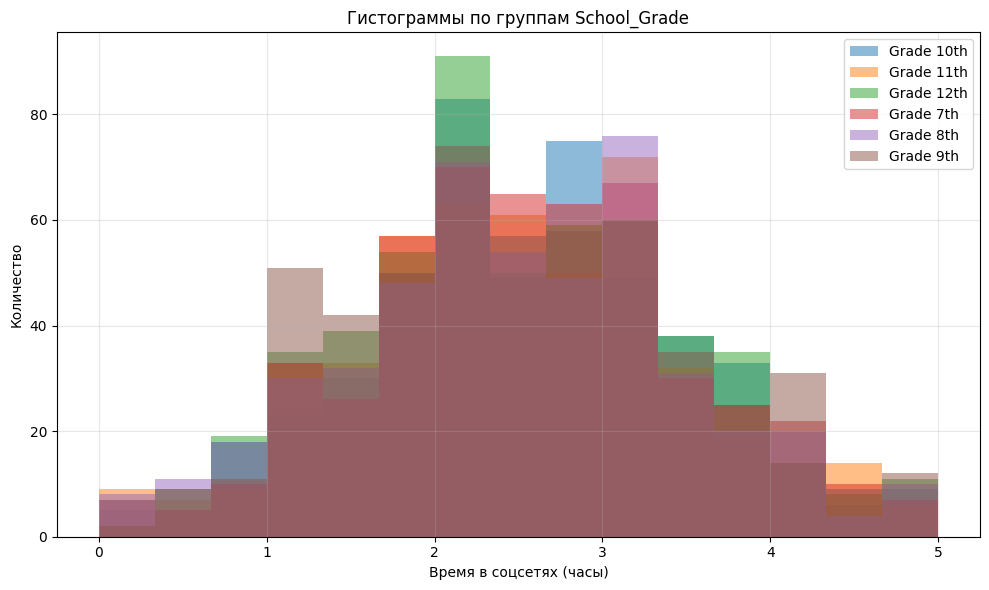

School_Grade: 10th | Среднее: 2.5240 | Дисперсия: 0.9227
School_Grade: 11th | Среднее: 2.4879 | Дисперсия: 0.9459
School_Grade: 12th | Среднее: 2.4639 | Дисперсия: 1.0140
School_Grade: 7th | Среднее: 2.5400 | Дисперсия: 0.9196
School_Grade: 8th | Среднее: 2.4699 | Дисперсия: 1.0304
School_Grade: 9th | Среднее: 2.5105 | Дисперсия: 1.0260


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('c:/Users/Ullecses/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')

# Группировка по 'School_Grade'
groups = df.groupby('School_Grade')['Time_on_Social_Media']

# Гистограммы для каждой группы на одном графике
plt.figure(figsize=(10, 6))
for name, group in groups:
    plt.hist(group, bins=15, alpha=0.5, label=f'Grade {name}')
plt.xlabel('Время в соцсетях (часы)')
plt.ylabel('Количество')
plt.title('Гистограммы по группам School_Grade')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Среднее и дисперсия внутри каждой группы
for name, group in groups:
    mean = group.mean()
    var = group.var()
    print(f"School_Grade: {name} | Среднее: {mean:.4f} | Дисперсия: {var:.4f}")


### Вывод по заданию 4
- Распределения по группам 'School_Grade' различаются: среднее и дисперсия варьируются от класса к классу.
- Гистограммы показывают, что в некоторых классах время в соцсетях выше или разброс больше.
- Это может отражать возрастные или социальные особенности.

### Промежуточные выводы по заданиям

**Задание 1.**
- Данные по времени в соцсетях имеют умеренную дисперсию, близкую к симметрии, с небольшим отрицательным эксцессом.
- Гистограмма и эмпирическая функция показывают распределение, близкое к нормальному, но с небольшими отклонениями.

**Задание 2.**
- По критериям хи-квадрат, асимметрии/эксцесса и Q-Q plot нормальность частично подтверждается, но есть признаки отклонения.
- Тест Шапиро-Уилка может дополнительно подтвердить или опровергнуть нормальность.

**Задание 3.**
- После удаления выбросов, логарифмирования и стандартизации распределение стало ближе к нормальному.
- Статистические характеристики улучшились, асимметрия и эксцесс уменьшились.
- Q-Q plot и критерии нормальности показывают лучший результат.

**Задание 4.**
- Распределения по группам 'School_Grade' различаются: среднее и дисперсия варьируются от класса к классу.
- Гистограммы показывают, что в некоторых классах время в соцсетях выше или разброс больше.
- Это может отражать возрастные или социальные особенности.

**Общий вывод:**
- Обработка данных улучшает их пригодность для статистического анализа.
- Внутригрупповые различия важны для интерпретации результатов.
- Рекомендуется использовать стандартизированные данные для дальнейших исследований.